#### Importando as LIBS

In [208]:

import numpy as np
import pandas as pd

import yfinance as yf
import openpyxl 
import datetime as dt

import seaborn as sns
import plotly.graph_objects as Dash
import plotly.express as px
import matplotlib.pyplot as plt


#### Importando os dados Ibovepa

In [209]:

ibovespa = yf.download(tickers='^BVSP', period='1y')['Adj Close']

[*********************100%***********************]  1 of 1 completed


#### Verificando DataFrame

In [210]:

ibovespa.head(15)

Ticker,^BVSP
Date,
2024-01-31,127752.0
2024-02-01,128481.0
2024-02-02,127182.0
2024-02-05,127593.0
2024-02-06,130416.0
2024-02-07,129608.0
2024-02-08,128217.0
2024-02-09,128026.0
2024-02-14,127018.0


#### Valores duplicados

In [211]:
ibovespa.duplicated().sum()

np.int64(7)

#### Info

In [212]:
ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-31 to 2025-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^BVSP   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


#### Estatisticas

In [213]:
ibovespa.describe()

Ticker,^BVSP
count,252.000000
mean,127562.690476
std,4203.708899
min,118533.000000
25%,124843.250000
50%,127690.500000
75%,129969.500000
max,137344.000000


#### Estilos do gráfico

In [214]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### média móvel

In [215]:
media_movel = ibovespa['^BVSP'].rolling(5).mean()

#### Gráfico

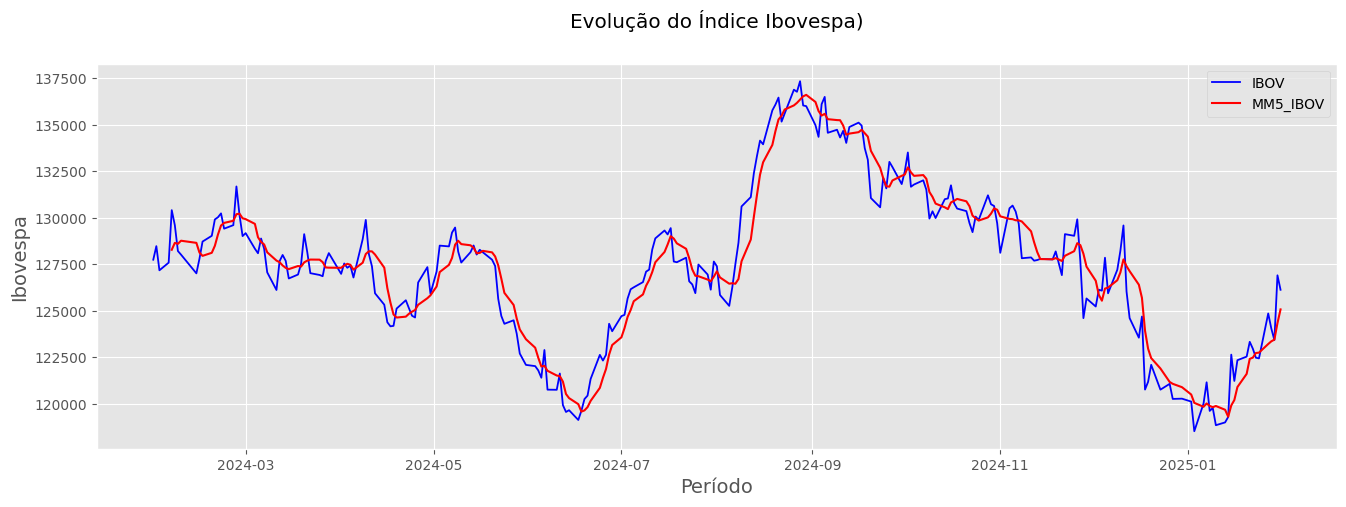

In [216]:
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Evolução do Índice Ibovespa)', pad=26)
plt.plot(ibovespa.index, ibovespa['^BVSP'], color='blue', linewidth=1.3, label='IBOV')
plt.plot(media_movel, color='red', label='MM5_IBOV')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Ibovespa', fontsize=14)
plt.legend();


#### Carteira de ativos 

In [217]:
tickers = ['PETR4.SA', 'WEGE3.SA', 'VALE']
carteira = yf.download(tickers=tickers, period='1y')['Adj Close']
carteira

[*********************100%***********************]  3 of 3 completed


Ticker,PETR4.SA,VALE,WEGE3.SA
Date,,,
2024-01-31,33.289200,NaN,31.772020
2024-02-01,33.950741,12.549185,32.056927
2024-02-02,33.509716,12.155879,32.017632
2024-02-05,33.656727,12.018680,32.675861
2024-02-06,33.967072,12.265640,32.656216
...,...,...,...
2025-01-27,37.180000,9.160000,53.310001
2025-01-28,37.130001,9.030000,54.090000
2025-01-29,36.900002,9.070000,54.430000


#### Informações da Carteira

In [218]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2024-01-31 to 2025-01-31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  252 non-null    float64
 1   VALE      251 non-null    float64
 2   WEGE3.SA  252 non-null    float64
dtypes: float64(3)
memory usage: 8.1 KB


#### Verificando valores nulos da carteira

In [219]:
carteira.isnull().sum()

Ticker
PETR4.SA    8
VALE        9
WEGE3.SA    8
dtype: int64

#### Mapa de calor nulos

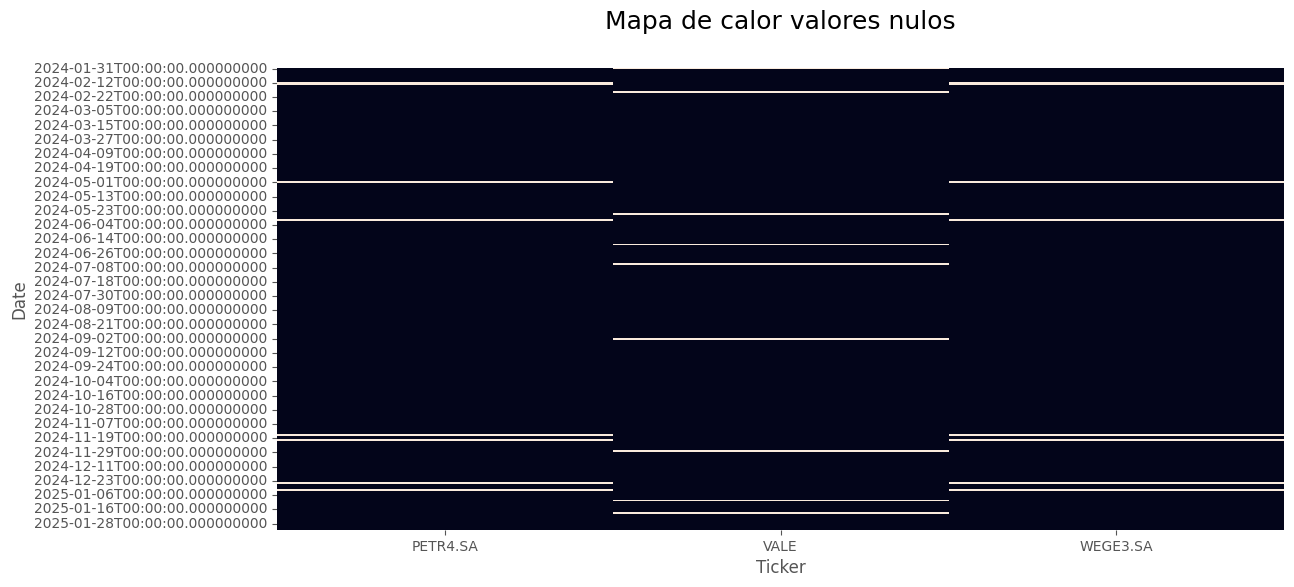

In [220]:
plt.figure(figsize=(13,6))
plt.title('Mapa de calor valores nulos', fontsize=18, pad=28)
sns.heatmap(carteira.isnull(), cbar=False);

#### Estatisticas da Carteira

In [221]:
carteira.describe()

Ticker,PETR4.SA,VALE,WEGE3.SA
count,252.000000,251.000000,252.000000
mean,34.125470,10.755478,46.513096
std,1.897709,1.054212,8.185504
min,29.115803,8.500000,31.772020
25%,33.033772,10.045301,38.281991
50%,34.185453,10.752587,48.459547
75%,35.438936,11.646246,54.063367
max,37.689999,12.549185,58.465912


#### Excluindo valores nulos da Carteira

In [222]:

carteira.dropna(inplace=True)

#### Informações da carteira após exclusao dos valores nulos 

In [223]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2024-02-01 to 2025-01-31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  243 non-null    float64
 1   VALE      243 non-null    float64
 2   WEGE3.SA  243 non-null    float64
dtypes: float64(3)
memory usage: 7.6 KB


#### Gráfico

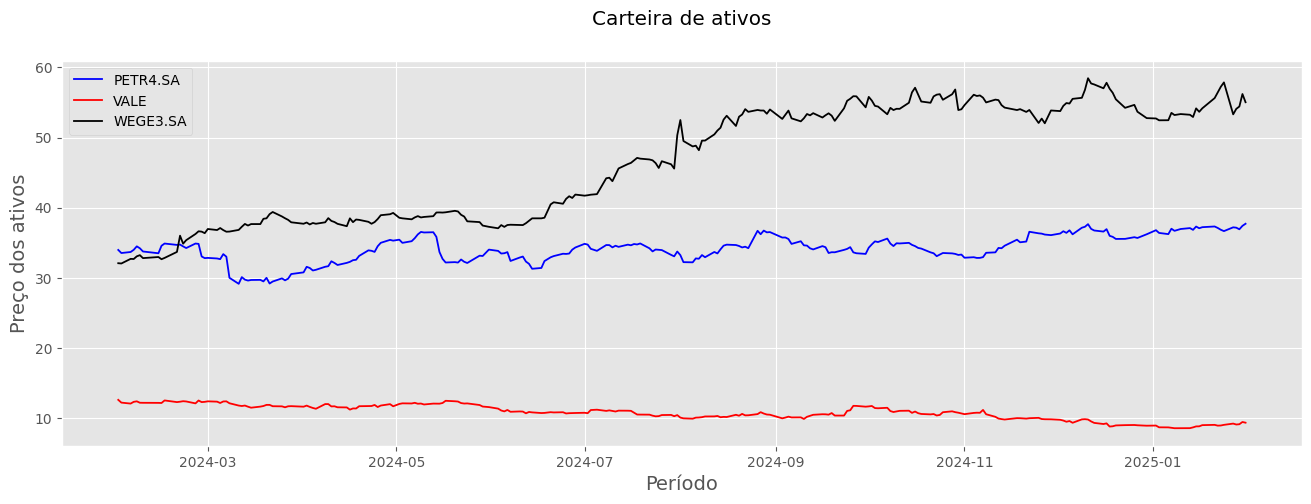

In [224]:
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Carteira de ativos', pad=26)
plt.plot(carteira.index, carteira['PETR4.SA'], color='blue', linewidth=1.3, label='PETR4.SA')
plt.plot(carteira['VALE'], color='red', linewidth=1.3, label='VALE')
plt.plot(carteira['WEGE3.SA'], color='black', linewidth=1.3, label='WEGE3.SA')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Preço dos ativos', fontsize=14)
plt.legend();


#### Normalizando os dados do ibovespa

In [225]:
ibovespa_normalizado = ibovespa / ibovespa.iloc[0]
ibovespa_normalizado.head()

Ticker,^BVSP
Date,
2024-01-31,1.000000
2024-02-01,1.005706
2024-02-02,0.995538
2024-02-05,0.998755
2024-02-06,1.020853


#### Carteira Normalizada

In [226]:
carteira_normalizada = carteira / carteira.iloc[0]
carteira_normalizada.head()

Ticker,PETR4.SA,VALE,WEGE3.SA
Date,,,
2024-02-01,1.000000,1.000000,1.000000
2024-02-02,0.987010,0.968659,0.998774
2024-02-05,0.991340,0.957726,1.019307
2024-02-06,1.000481,0.977405,1.018695
2024-02-07,1.015155,0.983236,1.030647


#### Gráfico : Ativos da Carteira e IBOVESPA

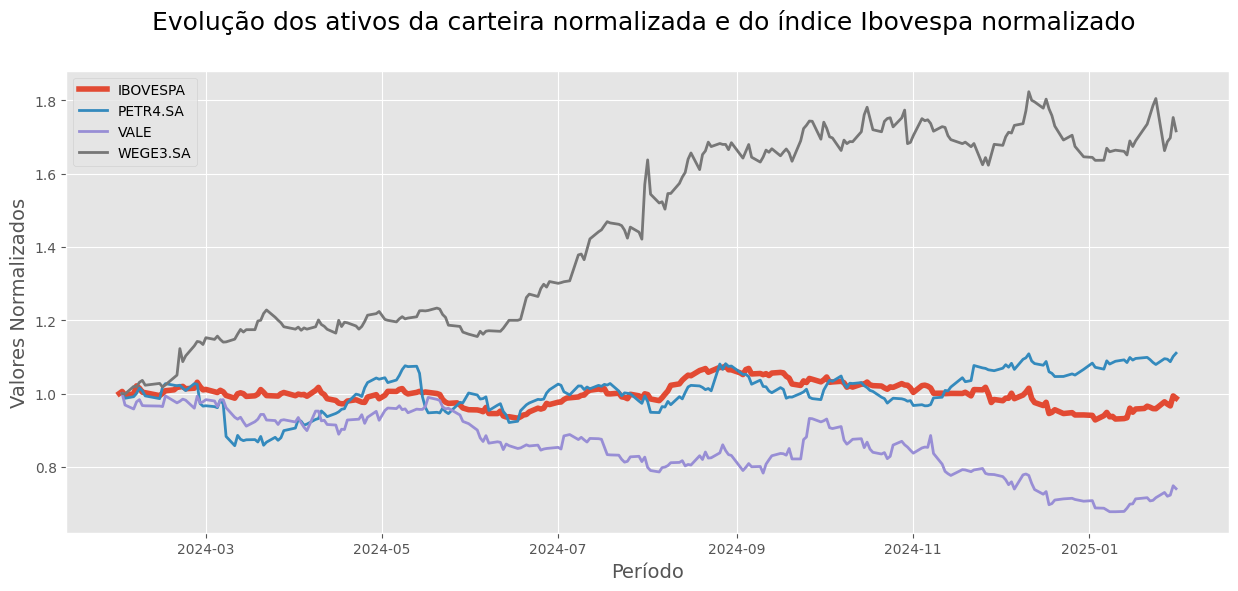

In [227]:
plt.figure(figsize=(15,6))
plt.title('Evolução dos ativos da carteira normalizada e do índice Ibovespa normalizado ', fontsize=18, pad=30)
plt.plot(ibovespa_normalizado.index, ibovespa_normalizado['^BVSP'], linewidth=4, label= 'IBOVESPA')
plt.plot(carteira_normalizada.index, carteira_normalizada['PETR4.SA'], linewidth=2, label= 'PETR4.SA')
plt.plot(carteira_normalizada.index, carteira_normalizada['VALE'], linewidth=2, label= 'VALE')
plt.plot(carteira_normalizada.index, carteira_normalizada['WEGE3.SA'], linewidth=2, label= 'WEGE3.SA')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Valores Normalizados', fontsize=14)
plt.legend();

In [228]:
# Gráfico de linhas
fig = px.line(ibovespa_normalizado,
               y='^BVSP',
               title='Variação do Ibovespa ao longo do tempo',
               color_discrete_sequence=['#6959CD']
               );

# Plotar 
fig.show()

In [229]:
# Criar dashboard


# Criando uma figura
figura = Dash.Figure()


# Adicionando o primeiro eixo
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['PETR4.SA'],
        mode='lines',
        name='PETR4.SA',
        marker_color='#ff7f0e',
        opacity=0.5,
    )
)



# Adicionando VALE
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['VALE'],
        mode='lines',
        name='VALE',
        marker_color='#d62728',
        opacity=0.5,
    )
)



# Adicionando a WEG3
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['WEGE3.SA'],
        mode='lines',
        name='WEGE3.SA',
        marker_color='#2ca02c'
    )
)

# Adicionando o IBOVESPA


figura.add_trace(
    Dash.Scatter(
        x=ibovespa_normalizado.index,
        y=ibovespa_normalizado['^BVSP'],
        mode='lines',
        name='IBOVESPA',
        marker_color='#4B0082'
    )
)



# Ajustes no layout
figura.update_layout(

    # título
    title='Evolução dos ativos da carteira normalizada e do índice Ibovespa normalizado ',
    # Tamanho
    titlefont_size=20,
    
    # Ajustando o eixo x
    xaxis=dict(
        title='Período Histórico',
        titlefont_size=14,
        tickfont_size=10
    ),


    # Ajustando o eixo y
    yaxis=dict(
        title='Valores Normalizados',
        titlefont_size=14,
        tickfont_size=10
    ),


    # Parâmetros para Legenda
    legend=dict(
        x=1,
        y=1
    )

)

## Importando dados do BACEN

###### Pesquisar do no google "BCB SGS"
###### Link: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
###### Pesquisar no google "api sgs bcb"
###### Link: https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/6e2b0c97-afab-4790-b8aa-b9542923cf88


### Função para extração de Dados do BACEN

In [230]:

def consulta_bcb(codigo_bcb):
    url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_bcb}/dados?formato=json"

    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace= True)
    return df

- ### Consulta: IPCA - em 12 meses

In [231]:
ipca_12M = consulta_bcb(13522)
ipca_12M
ipca_12M_2000 = ipca_12M[ipca_12M.index >= '2000-01-01']
ipca_12M_2000


,valor
data,
2000-01-01,8.85
2000-02-01,7.86
2000-03-01,6.92
2000-04-01,6.77
2000-05-01,6.47
...,...
2024-08-01,4.24
2024-09-01,4.42
2024-10-01,4.76


In [232]:
# Gráfico de linhas
fig = px.line(ipca_12M_2000,
               y='valor',
               title='Variação do IPCA em 12 meses ao longo do tempo',
               color_discrete_sequence=['#6959CD']
               );

# Plotar 
fig.show()

- ### Consulta: Taxa de juros - Meta Selic definida pelo Copom

In [233]:
selic_meta = consulta_bcb(432)
selic_meta_2000 = selic_meta[selic_meta.index >= '2000-01-01']
selic_meta_2000

,valor
data,
2000-01-01,19.00
2000-01-02,19.00
2000-01-03,19.00
2000-01-04,19.00
2000-01-05,19.00
...,...
2025-03-15,13.25
2025-03-16,13.25
2025-03-17,13.25


In [234]:
fig = px.line(selic_meta_2000,
               y='valor',
               title='Taxa de juros - Meta Selic definida pelo Copom',
               color_discrete_sequence=['#53f8f9']
               );

# Plotar 
fig.show()





In [235]:
ipca_12M_2000

,valor
data,
2000-01-01,8.85
2000-02-01,7.86
2000-03-01,6.92
2000-04-01,6.77
2000-05-01,6.47
...,...
2024-08-01,4.24
2024-09-01,4.42
2024-10-01,4.76


In [236]:
selic_meta_2000

,valor
data,
2000-01-01,19.00
2000-01-02,19.00
2000-01-03,19.00
2000-01-04,19.00
2000-01-05,19.00
...,...
2025-03-15,13.25
2025-03-16,13.25
2025-03-17,13.25


In [237]:
fig = Dash.Figure()

fig.add_trace(Dash.Scatter(
    x=selic_meta_2000.index,
    y=selic_meta_2000['valor'],
    mode='lines',
    name='Selic Meta', 
    line=dict(color='blue')  
))

fig.add_trace(Dash.Scatter(
    x=ipca_12M_2000.index,
    y=ipca_12M_2000['valor'],
    mode='lines',
    name='IPCA 12M', 
    line=dict(color='red')  
))

fig.update_layout(
    title='Evolução: Taxa SELIC META x IPCA-12M',
    xaxis_title='Data',
    yaxis_title='Valor',
    legend_title='Legenda'
)

fig.show()

### Taxa de Desocupação

In [241]:
Desemprego = consulta_bcb(24369)

In [239]:
Desemprego.tail()

,valor
data,
2024-08-01,6.6
2024-09-01,6.4
2024-10-01,6.2
2024-11-01,6.1
2024-12-01,6.2


In [240]:

fig = Dash.Figure()

fig.add_trace(Dash.Scatter(
    x=Desemprego.index,
    y=Desemprego['valor'],
    mode='lines',
    name='Taxa Desocupação', 
    line=dict(color='blue')  
))


fig.update_layout(
    title='Evolução % Mensal da Taxa de desocupação - Desemprego',
    xaxis_title='Data',
    yaxis_title='Valor',
    legend_title='Legenda'
)

fig.show()
